# WEEK 3 - FILE 2

# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df=pd.read_csv("mtcars.csv")
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
#Checking for null values
df.isnull().sum()

Unnamed: 0    0
mpg           0
cyl           0
disp          0
hp            0
drat          0
wt            0
qsec          0
vs            0
am            0
gear          0
carb          0
dtype: int64

In [4]:
df.columns

Index(['Unnamed: 0', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')

In [5]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


<Axes: >

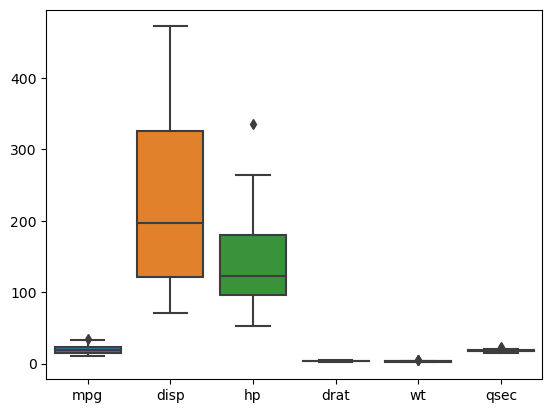

In [6]:
sns.boxplot(data=df[['mpg','disp', 'hp', 'drat', 'wt', 'qsec']])

In [7]:
df.corr()

C:\Users\Shriya Bhat\AppData\Local\Temp\ipykernel_21232\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


C:\Users\Shriya Bhat\AppData\Local\Temp\ipykernel_21232\4044480545.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), annot=True, cmap='coolwarm', linewidths=.5)


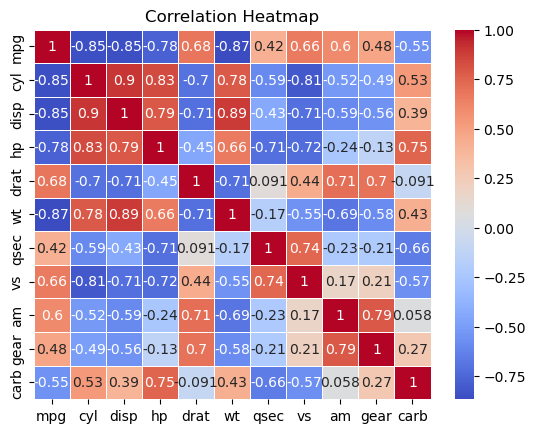

In [8]:
sns.heatmap(data=df.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Correlation Heatmap')
plt.show()

### Let us take x to be 'wt' column and let y be 'mpg'

In [9]:
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [10]:
df.columns

Index(['Unnamed: 0', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')

In [11]:
X = df.iloc[:, [6]]  #wt
y = df.iloc[:, [1]]  #mpg
# Converting selected columns to arrays
X_array = X.values
Y_array = y.values
X_array

array([[2.62 ],
       [2.875],
       [2.32 ],
       [3.215],
       [3.44 ],
       [3.46 ],
       [3.57 ],
       [3.19 ],
       [3.15 ],
       [3.44 ],
       [3.44 ],
       [4.07 ],
       [3.73 ],
       [3.78 ],
       [5.25 ],
       [5.424],
       [5.345],
       [2.2  ],
       [1.615],
       [1.835],
       [2.465],
       [3.52 ],
       [3.435],
       [3.84 ],
       [3.845],
       [1.935],
       [2.14 ],
       [1.513],
       [3.17 ],
       [2.77 ],
       [3.57 ],
       [2.78 ]])

In [12]:
df.fillna(method ='ffill', inplace = True)#no difference made since no null values present

In [13]:
df.isnull().sum()

Unnamed: 0    0
mpg           0
cyl           0
disp          0
hp            0
drat          0
wt            0
qsec          0
vs            0
am            0
gear          0
carb          0
dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

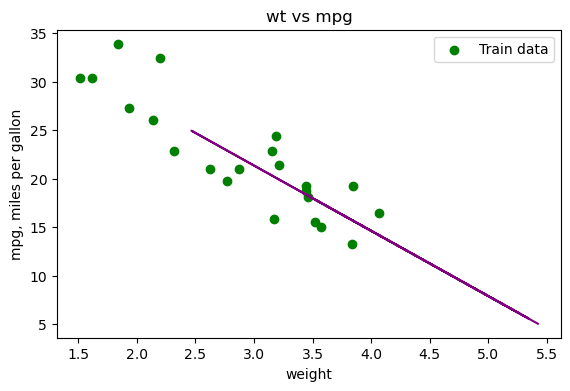

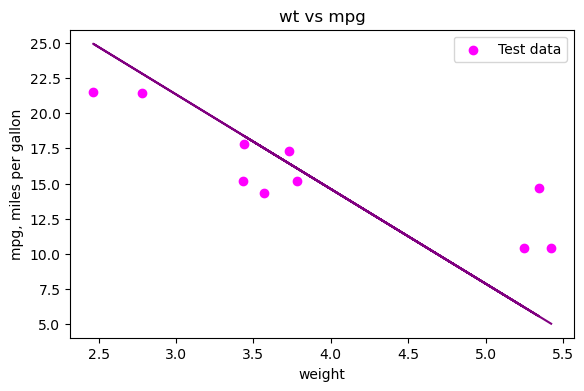

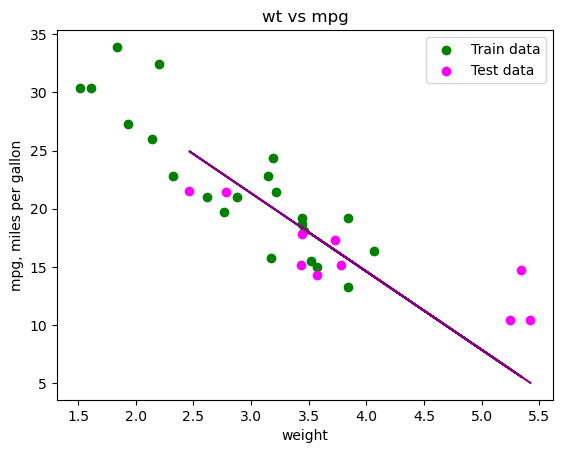

Coeficient:  -6.725166614780358
Intercept:  [41.51432018]



Evaluation metrics:

R squared for test data:  -0.25226160403032827
mean_squared_error :  16.604487964800537
mean_absolute_error :  3.2304961836414305


In [15]:
y_pred = regr.predict(X_test)

plt.figure(figsize=((6.5,4)))
plt.scatter(X_train, y_train, color ='g',label="Train data")
plt.plot(X_test, y_pred,color="purple")
plt.xlabel('weight') 
plt.ylabel('mpg, miles per gallon')
plt.title("wt vs mpg")
plt.legend()
plt.show()

plt.figure(figsize=((6.5,4)))
plt.scatter(X_test, y_test, color ='magenta',label="Test data")
plt.plot(X_test, y_pred,color="purple")
plt.xlabel('weight') 
plt.ylabel('mpg, miles per gallon')
plt.title("wt vs mpg")
plt.legend()
plt.show()

plt.scatter(X_train, y_train, color ='g',label="Train data")
plt.xlabel('weight') 
plt.ylabel('mpg, miles per gallon')
plt.title("wt vs mpg")

plt.scatter(X_test, y_test, color ='magenta',label="Test data")
plt.plot(X_test, y_pred,color="purple")
plt.legend()
plt.show()

print("Coeficient: ",regr.coef_[0][0])
print("Intercept: ",regr.intercept_)
print("\n\n\nEvaluation metrics:\n")
print("R squared for test data: ",regr.score(X_test, y_test))
print( 
  'mean_squared_error : ', mean_squared_error(y_test, y_pred)) 
print( 
  'mean_absolute_error : ', mean_absolute_error(y_test, y_pred)) 




# Multilinear regression - many independent variables

In [36]:
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [37]:
#Min Max Normalization to ensure that no single column drastically affects the model
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 10))
df[['mpg','disp', 'hp', 'drat', 'wt', 'qsec']] = scaler.fit_transform(df[['mpg','disp', 'hp', 'drat', 'wt', 'qsec']])
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,4.510638,6,2.217511,2.049470,5.253456,2.830478,2.333333,0,1,4,4
1,Mazda RX4 Wag,4.510638,6,2.217511,2.049470,5.253456,3.482485,3.000000,0,1,4,4
2,Datsun 710,5.276596,4,0.920429,1.448763,5.023041,2.063411,4.892857,1,1,4,1
3,Hornet 4 Drive,4.680851,6,4.662010,2.049470,1.474654,4.351828,5.880952,1,0,3,1
4,Hornet Sportabout,3.531915,8,7.206286,4.346290,1.797235,4.927129,3.000000,0,0,3,2


In [38]:
def replace_outliers_with_median(column):
    # Calculate the median
    median_value = column.median()

    # Calculate the IQR (Interquartile Range)
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the median
    column_outliers_replaced = column.where((column >= lower_bound) & (column <= upper_bound), median_value)

    return column_outliers_replaced

# Replace outliers in 'column_name' with the median
df['mpg'] = replace_outliers_with_median(df['mpg'])


In [40]:
df.columns

Index(['Unnamed: 0', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')

In [41]:
X=df[['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb']]
y=df[['mpg']]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
model = LinearRegression() 
model.fit(X_train,y_train)
predictions = model.predict(X_test)  

print("\nCoeficient: ",model.coef_,end="\n\n")
print("Intercept: ",model.intercept_,end="\n")
print("\n\nEvaluation metrics:\n")
print("R squared: ",model.score(X_test, y_test))
print( 
  'mean_squared_error : ', mean_squared_error(y_test, predictions)) 
print( 
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))





Coeficient:  [[ 0.5800994   0.05641287 -0.00945122  0.21221816 -0.47155312  0.23648518
   0.44246131  1.36475881  1.37739539 -0.82210993]]

Intercept:  [-2.78900223]


Evaluation metrics:

R squared:  -0.682918606922567
mean_squared_error :  5.537830709359829
mean_absolute_error :  1.8425154627897367
